In [1]:
import numpy as np
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
%matplotlib inline

In [2]:
file_spheres = '/Users/forero/github/Skeleton/Data/Simulaciones/entropiasCV.txt'
file_shells = '/Users/forero/github/Skeleton/Data/Simulaciones/entropias_shell.txt'
file_rsd = '/Users/forero/github/Skeleton/Data/Simulaciones/entropias_rsd.txt'
file_percentage = '/Users/forero/github/Skeleton/Data/Simulaciones/entropias_por.txt'
file_percentage_random = '/Users/forero/github/Skeleton/Data/Simulaciones/entropias_por_random.txt'
file_random = '/Users/forero/github/Skeleton/Data/Simulaciones/entropias_random.txt'
file_vpf_radii = 'void_probability_function_radii.dat'
file_vpf_sphere = 'void_probability_function_sphere_00.dat'
file_vpf_random = 'void_probability_function_random.dat'

In [9]:
data_spheres = np.loadtxt(file_spheres)
data_shells = np.loadtxt(file_shells)
data_rsd = np.loadtxt(file_rsd)
data_percentage = np.loadtxt(file_percentage)
data_percentage_random = np.loadtxt(file_percentage_random)
data_random = np.loadtxt(file_random)
data_vpf_radii = np.loadtxt(file_vpf_radii)
data_vpf_sphere = np.loadtxt(file_vpf_sphere)
data_vpf_random = np.loadtxt(file_vpf_random)

n_spheres = np.shape(data_spheres)[1]
n_beta = np.shape(data_spheres)[0]
n_percentage = np.shape(data_percentage)[1]
beta_values = np.linspace(1.0, 5.0, n_beta)

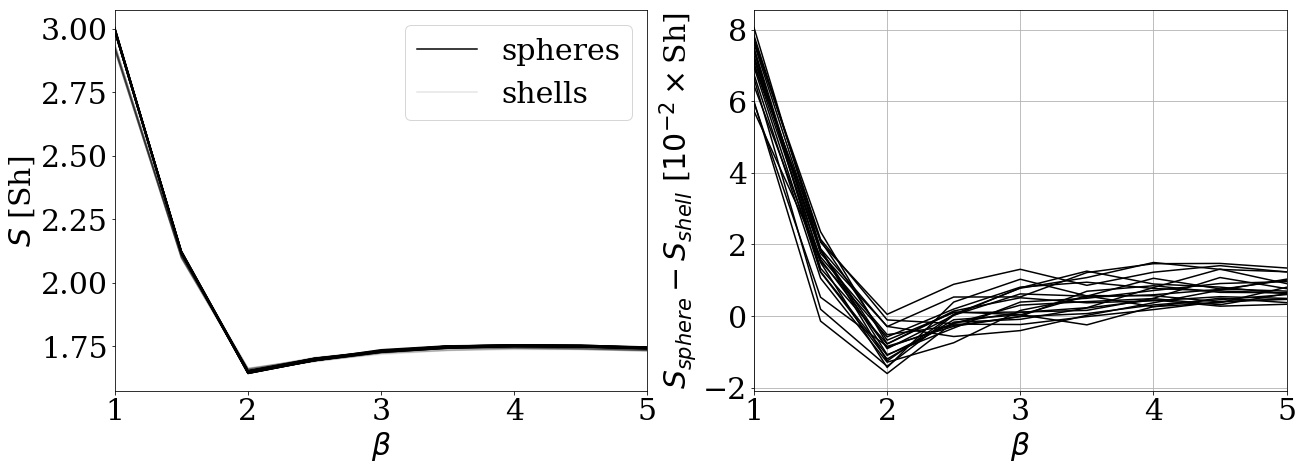

In [5]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
for i in range(n_spheres):
    if i==0:
        plt.plot(beta_values, data_spheres[:,i], color='black', label='spheres')
        plt.plot(beta_values, data_shells[:,i], color='black', alpha=0.1, label='shells')
    else:
        plt.plot(beta_values, data_spheres[:,i], color='black')
        plt.plot(beta_values, data_shells[:,i], color='black', alpha=0.1)
        
plt.ylabel("$S$ [Sh]")
plt.xlabel(r"$\beta$")
plt.legend(fontsize=MEDIUM_SIZE)
plt.xticks(np.arange(1,6))
plt.xlim([1,5])

plt.subplot(1,2,2)
for i in range(n_spheres):
    plt.plot(beta_values, 100*(data_spheres[:,i]-data_shells[:,i]), color='black')
plt.ylabel(r"$S_{sphere} - S_{shell}$ [$10^{-2}\times$Sh]")
plt.xlabel(r"$\beta$")
plt.xticks(np.arange(1,6)) 
plt.xlim([1,5])
plt.grid()
plt.savefig("geometry.pdf", bbox_inches='tight')


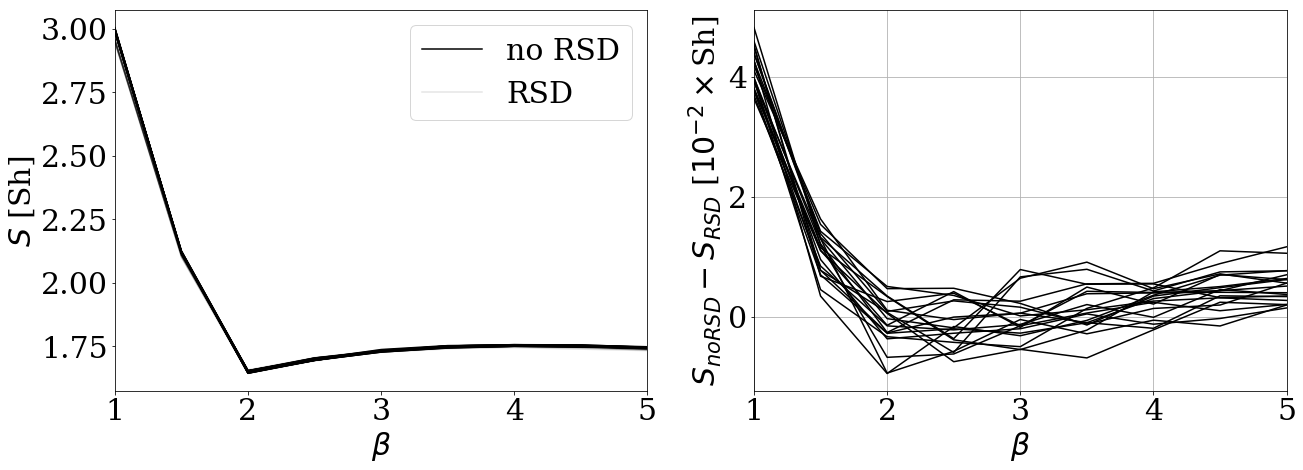

In [7]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
for i in range(n_spheres):
    if i==0:
        plt.plot(beta_values, data_spheres[:,i], color='black', label='no RSD')
        plt.plot(beta_values, data_rsd[:,i], color='black', alpha=0.1, label='RSD')
    else:
        plt.plot(beta_values, data_spheres[:,i], color='black')
        plt.plot(beta_values, data_rsd[:,i], color='black', alpha=0.1)
        
plt.ylabel("$S$ [Sh]")
plt.xlabel(r"$\beta$")
plt.legend(fontsize=MEDIUM_SIZE)
plt.xticks(np.arange(1,6))
plt.xlim([1,5])

plt.subplot(1,2,2)
for i in range(n_spheres):
    plt.plot(beta_values, 100*(data_spheres[:,i]-data_rsd[:,i]), color='black')
plt.ylabel(r"$S_{no RSD} - S_{RSD}$ [$10^{-2}\times$Sh]")
plt.xlabel(r"$\beta$")
plt.xticks(np.arange(1,6)) 
plt.xlim([1,5])
plt.grid()
plt.savefig("rsd.pdf", bbox_inches='tight')




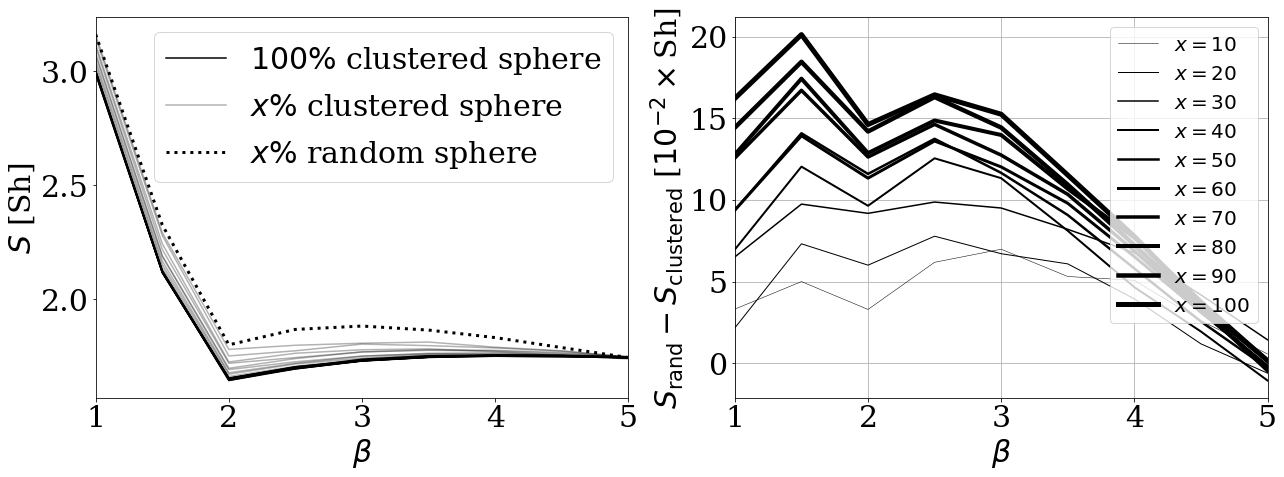

In [89]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
for i in range(n_percentage):
    if i==0:
        plt.plot(beta_values, data_spheres[:,i], color='black', label=r'$100\%$ clustered sphere')
        plt.plot(beta_values, data_percentage[:,i], color='black', alpha=0.3, label=r'$x\%$ clustered sphere')
        plt.plot(beta_values, data_random[:,i], ':', color='black', lw=3, label=r'$x\%$ random sphere')
    else:
        plt.plot(beta_values, data_spheres[:,i], color='black')
        plt.plot(beta_values, data_percentage[:,i], color='black', alpha=0.3)

        
plt.ylabel("$S$ [Sh]")
plt.xlabel(r"$\beta$")
plt.legend(fontsize=MEDIUM_SIZE)
plt.xticks(np.arange(1,6))
plt.xlim([1,5])

plt.subplot(1,2,2)
for i in range(n_percentage):
    plt.plot(beta_values, 100*(data_percentage_random[:,i]-data_percentage[:,i]), color='black', lw=(i+1)/2.0, label=r'$x={}$'.format(10*i + 10))
plt.legend(fontsize=20, loc=1)
plt.ylabel(r"$S_{\mathrm {rand}} - S_{\mathrm{clustered}}$ [$10^{-2}\times$Sh]")
plt.xlabel(r"$\beta$")
plt.xticks(np.arange(1,6)) 
plt.xlim([1,5])
plt.grid()
plt.savefig("n_density_clustered.pdf", bbox_inches='tight')

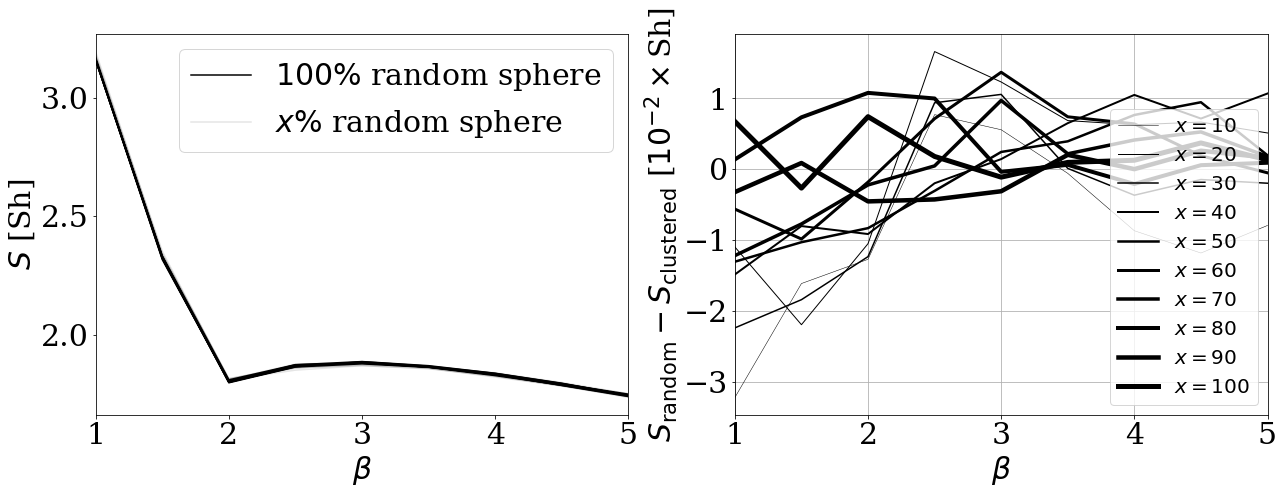

In [88]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
for i in range(n_percentage):
    if i==0:
        plt.plot(beta_values, data_random[:,i], color='black', label=r'$100\%$ random sphere')
        plt.plot(beta_values, data_percentage_random[:,i], color='black', alpha=0.1, label=r'$x\%$ random sphere')
    else:
        plt.plot(beta_values, data_random[:,i], color='black')
        plt.plot(beta_values, data_percentage_random[:,i], color='black', alpha=0.1)
        
plt.ylabel("$S$ [Sh]")
plt.xlabel(r"$\beta$")
plt.legend(fontsize=MEDIUM_SIZE)
plt.xticks(np.arange(1,6))
plt.xlim([1,5])

plt.subplot(1,2,2)
for i in range(n_percentage):
    plt.plot(beta_values, 100*(data_random[:,i]-data_percentage_random[:,i]), color='black', lw=(i+1)/2.0, label=r'$x={}$'.format(10*i + 10))
plt.legend(fontsize=20, loc=4)
plt.ylabel(r"$S_{\mathrm {random}} - S_{\mathrm{clustered}}$ [$10^{-2}\times$Sh]")
plt.xlabel(r"$\beta$")
plt.xticks(np.arange(1,6)) 
plt.xlim([1,5])
plt.grid()
plt.savefig("n_density_random.pdf", bbox_inches='tight')

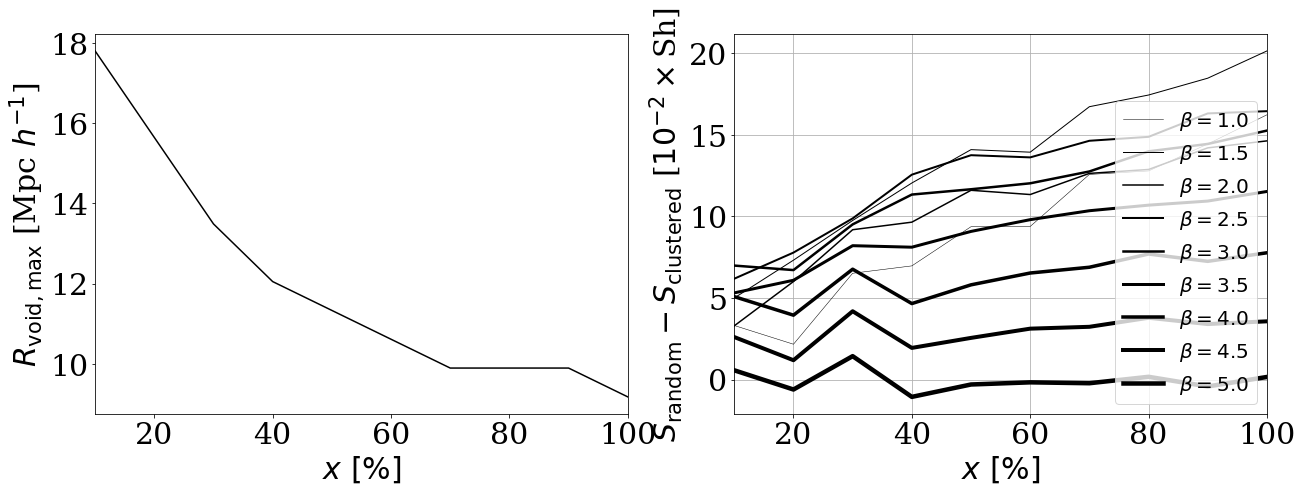

In [90]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)

ratio_vpf = data_vpf_sphere/data_vpf_random
max_size = np.ones(n_percentage)

for i in range(n_percentage):
    ii = np.argmax(ratio_vpf[i,:])
    max_size[i] = data_vpf_radii[ii]

plt.plot(np.arange(10,110,10), max_size , color='black')
#plt.legend(fontsize=20, loc=1)
plt.ylabel(r"$R_{\mathrm{void, max}}$ [Mpc $h^{-1}$]")
plt.xlabel(r"$x\ [\%]$")
plt.xticks(np.arange(0,120,20))
plt.xlim([10,100])

plt.subplot(1,2,2)
for i in range(n_beta):
    if i%1==0:
        plt.plot(np.arange(10,110,10), 100*(data_percentage_random[i,:]-data_percentage[i,:]), color='black', lw=(i+1)/2.0, label=r'$\beta={}$'.format(beta_values[i]))
plt.legend(fontsize=20, loc=4)
plt.ylabel(r"$S_{\mathrm{random}} - S_{\mathrm{clustered}}$ [$10^{-2}\times$Sh]")
plt.xlabel(r"$x\ [\%]$")
plt.xlim([10,100])
plt.grid()
plt.savefig("void_function.pdf", bbox_inches='tight')


In [47]:
np.arange(110,10,-10)

array([110, 100,  90,  80,  70,  60,  50,  40,  30,  20])